## Cleaning Data in Pyhon

### Common Data Problems

- Garbage In Garbage Out

#### Data type contsraints
- Our variables must have the correct data types

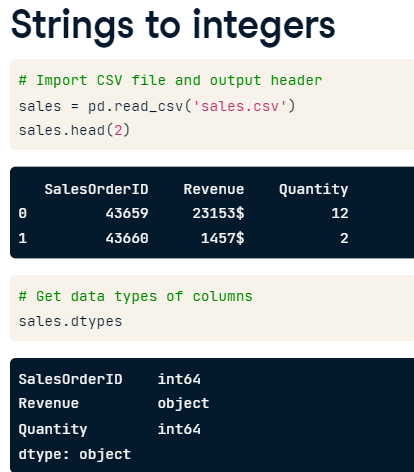

In [ ]:
# Converting Strings to Integers
sales = pd.read_csv('sales.csv')
# Get the data types of the columns
sales.dtypes
# Conversion to int after removing the $ sign at the end in Revenue 
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')
# Verifying that 'Revenue' is an integer
# The assert statement returns nothing if the condition is met and an error if the condition is not met
assert sales['Revenue'].dtype == 'int'


### Data Range Constraints

- There is an error in data collection as the average rating of movies should be between 1-5 while some movies have a rating of 6

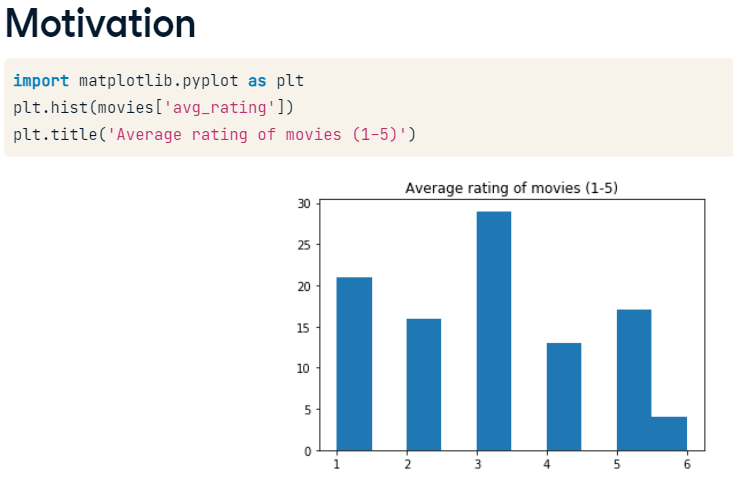

### How to deal with out of range data?

- Drop data if a very small percentage of the data from the dataset is out of range
- Set Custom minimum or maximum ranges on columns
- Date Range example
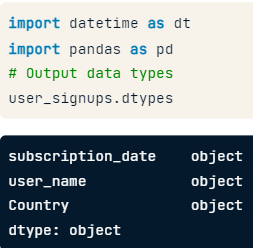

In [ ]:
# Droping out of range data using filtering
movies = movies[movies['avg_rating'] <= 5]

# Droping out of range data using .drop()
movies.drop(movies[movies['avg_rating']>5].index, inplace = True)

# Setting a hard limit
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5

# DATE RANGE EXAMPLE
import datetime as dt
import pandas as pd
# Converting object dtype to date dtype
user_signups['subscription_date'] = pd.to_datetime(user_signups['subscription_date']).dt.date
today_date = dt.date.today()

### Uniqueness constraint
- Duplicate values
- Often arrise due to joining datasets

#### How to find duplicate values?
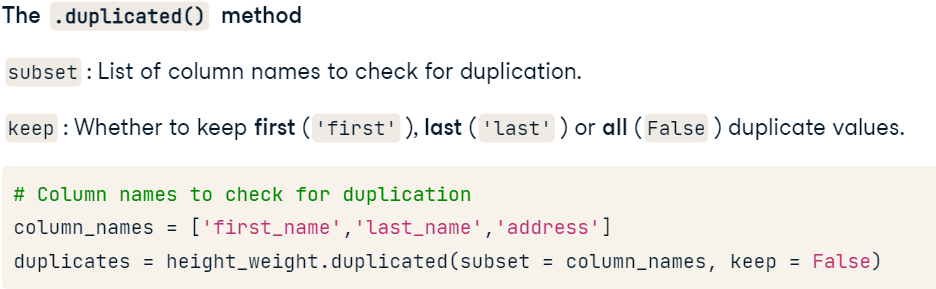

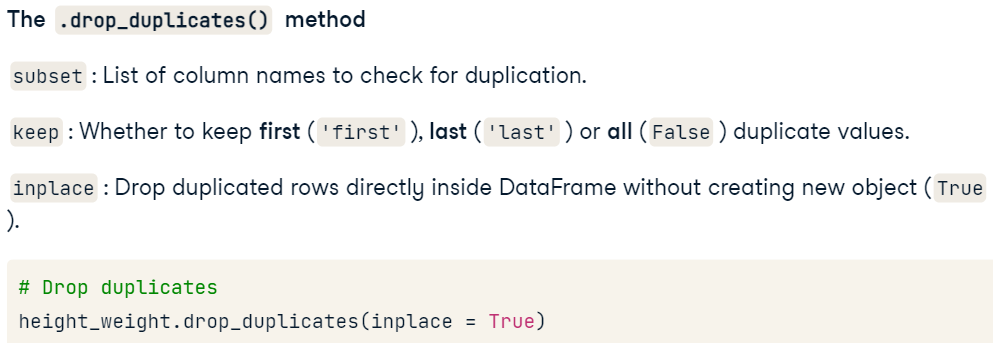


In [ ]:
# HOW TO FIND DUPLICATE VALUES?
# .duplicated() function returns True for duplicate values and False for non duplicate values
duplicates = height_weight.duplicated()
print(duplicates)

### Membership Constraints

- Inconsistencies can arise due to data entry errors or parsing errors.

### How to treat these problems?

1) Dropping Data:

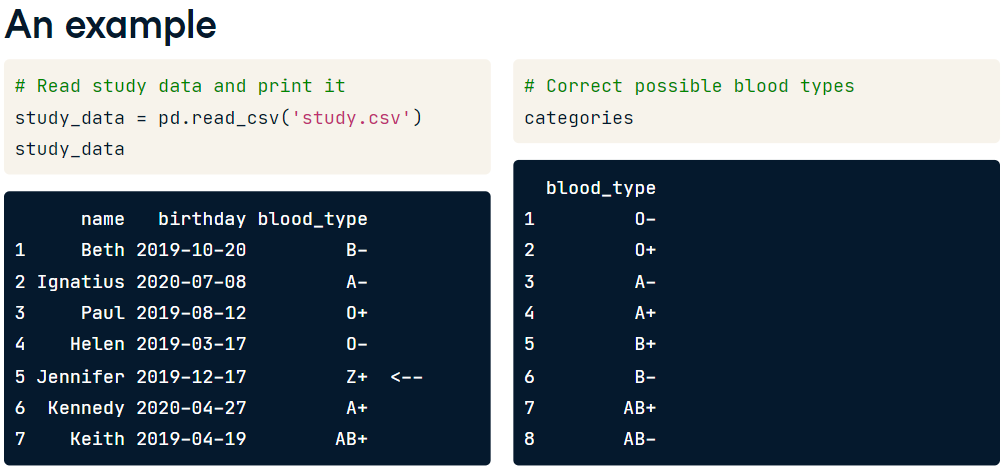
- There is no blood type as Z+
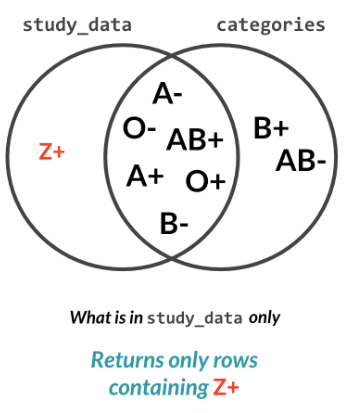
- A Left Anti Join returns all the inconsistent entries 
- An Inner join returns all the consistent entries

2) Remapping Categories
3) Inferring Categories

In [ ]:
#  Membership Constraints

# 1) Dropping Data:
# Performing an anti join
inconsistent_categories = set(study_data[blook_type].difference(categories['blood_type']))
# Get and print rows with inconsistent categories
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data['inconsistent_rows']
# Droping inconsistent categories to get consistent rows only
consistent_data = study_data[~inconsistent_rows]


### Categorical Variables

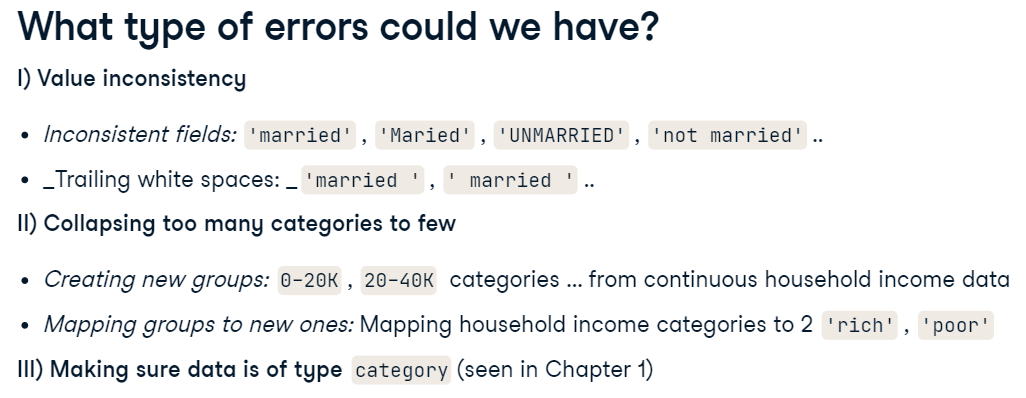

1) Value Consistency

- Capitalization can be a problem. eg:
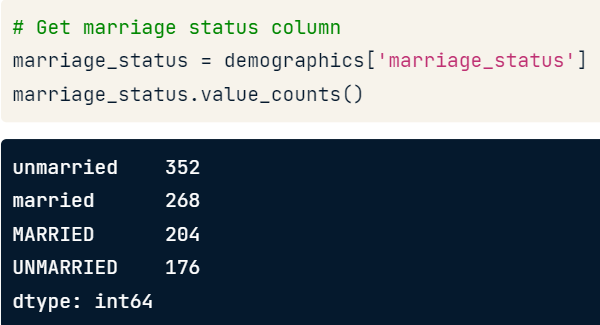
Solution: Capitalize, or Lowercase all the values

- Leading or Trailing Spaces
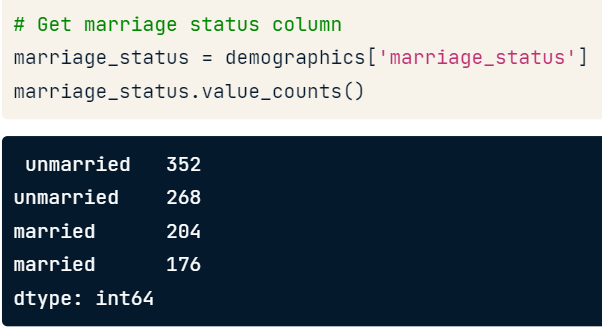
Solution: use the str.strip() method

- Collapsing data into categories
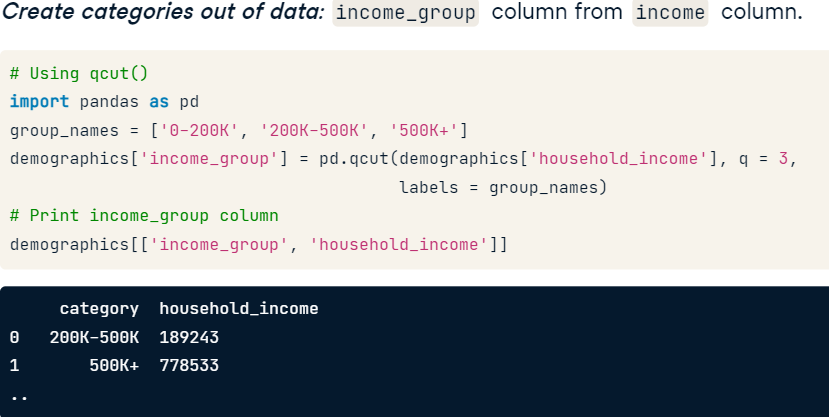

- Mapping categories into fewer ones
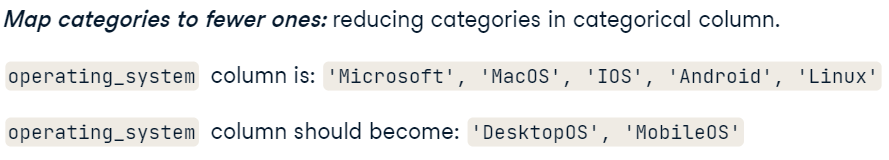

In [ ]:
# 1) Value Consistency:

# Capitalization
marraige_status['marraige_status'] = marraige_status['marraige_status'].str.upper()
# Checking the results
marraige_status['marraige_status'].value_counts()

# Leading or Trailing Spaces
demographics = demographics['marraige_status'].str.strip()
# Checking the results
demographics['marriage_status'].value_counts()

# Collapsing data into categories using qcut()
group_names = ['0-200K', '200K-500K', '500K+']
demographics['income_group'] = pd.qcut(demographics['household_income'], q = 3, labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]

# Collapsing data into categories using cut()
ranges = [0, 200000, 500000, np.inf]
group_names = ['0-200K', '200K-500K', '500K+']
# Create income_group column
demographics['income_group'] = pd.cut(demographics['household_income'], bins = ranges, labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]

# Mapping categories into fewer ones
mapping = {'Microsoft': 'DesktopOS', 'MacOS': "DesktopOS", "Linux":'DesktopOS', 'IOS':"MobileOS", "Android":"MobileOS"}
devices['operating_system'] = devices['opertaing_system'].replace(mapping)
devices['operating_system'].unique()



### Text Data

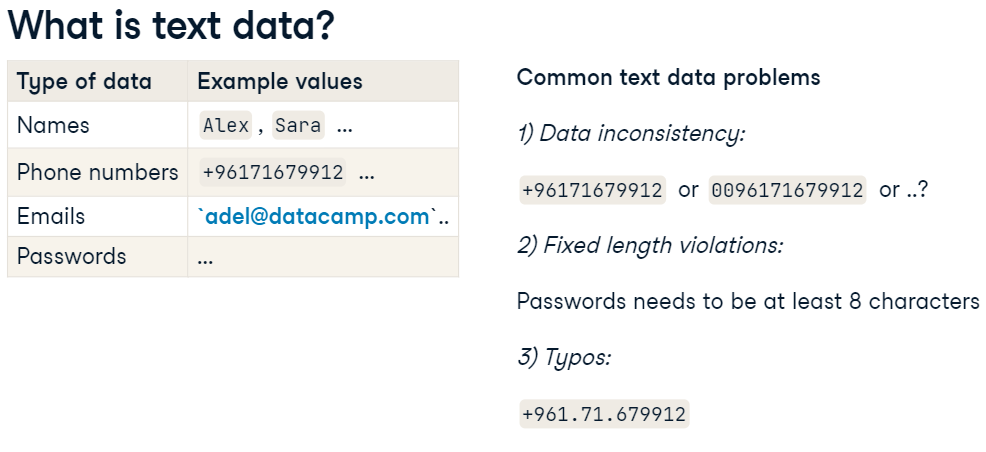

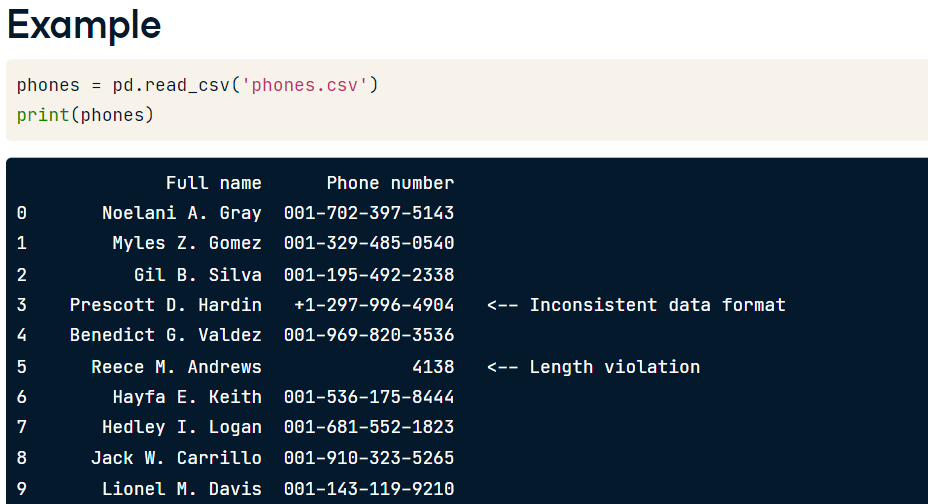

COMPLICATED EXAMPLE
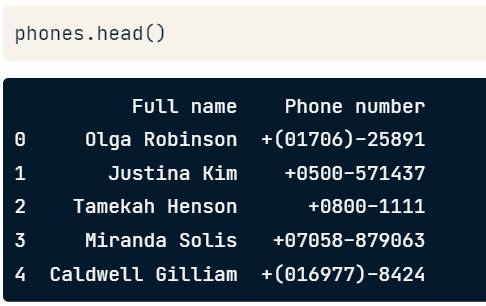



In [ ]:
# FIXING PHONE NUMBER COLUMN

# Replacing "+" with "00"
phones["Phone number"] = phones["Phone number"].str.replace("+", "00")

# Replacing phone numbers with less than 10 digits to NaN
digits = phones['Phone number'].str.len()
phones.loc[digits < 10, "Phone number"] = np.nan
phones

# Assert statements to check the channges that we made
# Find length of each row in phone number column
sanity_check = phone['Phone number'].str.len()
# Assert minimum phone number length is 10
assert sanity_check.min() >= 10
# Assert all numbers do not have '+' or '-'
assert phones['Phone number'].str.contains("+|-").any == False

# COMPLICATED EXAMPLE
# Regular Expressions in action
phones['Phone number'] = phones['Phone number'].str.replace(r'\D+', '') # '\D+' meand anything that is not a digit
phones.head()


